<a href="https://colab.research.google.com/github/Samarjeet-singh-chhabra/EDA-Hotel-Booking-Analysis/blob/main/PERSONAL_NOTEBOOK_CP1_Hotel_Booking_EDA_Samarjeet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**


Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

Explore and analyze the data to discover important factors that govern the bookings.

#**Starting with Importing libraries and dataset also taking a overview**

##Adding required libraries.

In [52]:
# Importing Libraries
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


##Adding the CSV file




In [53]:
#accessing it by link
url = "https://drive.google.com/file/d/1EGYfR6Q0LIN7DWJg9rp0WMwVcW9F9UG4/view?usp=sharing"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

## Reading csv file 

In [54]:
#making hotels_df the dataframe name
hotels_df = pd.read_csv(url) 

##Exploring Dataset

### Data Description:

1. **hotel** : *Hotel(Resort Hotel or City Hotel)* 

2. **is_canceled** : *Value indicating if the booking was canceled (1) or not (0)*

3. **lead_time** :* Number of days that elapsed between the entering date of the booking into the PMS and the arrival date*

4. **arrival_date_year** : *Year of arrival date*

5. **arrival_date_month** : *Month of arrival date*

6. **arrival_date_week_number** : *Week number of year for arrival date*

7. **arrival_date_day_of_month** : *Day of arrival date*

8. **stays_in_weekend_nights** : *Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel*

9. **stays_in_week_nights** : *Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel*

10. **adults** : *Number of adults*

11. **children** : *Number of children*

12. **babies** : *Number of babies*

13. **meal** : *Type of meal booked. Categories are presented in standard hospitality meal packages:*

14. **country** : *Country of origin.`*

15. **market_segment** : *Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

16. **distribution_channel** : *Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”*

17. **is_repeated_guest** : *Value indicating if the booking name was from a repeated guest (1) or not (0)*

18. **previous_cancellations** : *Number of previous bookings that were cancelled by the customer prior to the current booking*

19. **previous_bookings_not_canceled** : *Number of previous bookings not cancelled by the customer prior to the current booking*

20. **reserved_room_type** : *Code of room type reserved. Code is presented instead of designation for anonymity reasons.*

21. **assigned_room_type** : *Code for the type of room assigned to the booking.* 

22. **booking_changes** : *Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation*

23. **deposit_type** : *Indication on if the customer made a deposit to guarantee the booking.*

24. **agent** : *ID of the travel agency that made the booking*

25. **company** : *ID of the company/entity that made the booking or responsible for paying the booking.* 

26. **days_in_waiting_list** : *Number of days the booking was in the waiting list before it was confirmed to the customer*

27. **customer_type** : *Type of booking, assuming one of four categories*


28. **adr** : *Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying night*

29. **required_car_parking_spaces** : *Number of car parking spaces required by the customer*

30. **total_of_special_requests** :* Number of special requests made by the customer (e.g. twin bed or high floor)*

31. **reservation_status** : *Reservation last status, assuming one of three categories*
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why





32. **reservation_status_date** : *Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel*

In [55]:
#Checking the shape of the dataset
hotels_df.shape

(119390, 32)

In [56]:
#Checking basic information of all columns of the dataset
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [57]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
hotels_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [58]:
#printing first 5 rows of dataset
hotels_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [59]:
#printing last 5 rows of dataset
hotels_df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


## Checking for Types of Variable in some columns(unique values)


# **Cleaning the Dataset**

In [60]:
#creating copy of dataframe 
hotels_df_copy =hotels_df.copy()

In [61]:
# Removing duplicate rows if any
hotels_df_copy[hotels_df_copy.duplicated()].shape 

(31994, 32)

In [62]:
# Droping duplicate values 
hotels_df_copy.drop_duplicates(inplace = True)   
hotels_df_copy.shape

(87396, 32)

In [63]:
# cheking  for null values 
hotels_df.isna().sum(axis = 0)

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Agent, company, children and country are having most null values, Cheking on them and fixing them.

In [64]:
# Cheking content in agent column
agent_list = hotels_df['agent']
agent_list.head(15)

0       NaN
1       NaN
2       NaN
3     304.0
4     240.0
5     240.0
6       NaN
7     303.0
8     240.0
9      15.0
10    240.0
11    240.0
12    240.0
13    241.0
14    241.0
Name: agent, dtype: float64

In [65]:
# Cheking content in company column
company_list = hotels_df['company']
company_list.head(15)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
Name: company, dtype: float64

In [66]:
# Cheking content in country column
country_list = hotels_df['country']
country_list.head(15)

0     PRT
1     PRT
2     GBR
3     GBR
4     GBR
5     GBR
6     PRT
7     PRT
8     PRT
9     PRT
10    PRT
11    PRT
12    USA
13    ESP
14    PRT
Name: country, dtype: object

In [67]:
# Cheking content in country column
children_list = hotels_df['children']
children_list.head(15)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    1.0
14    0.0
Name: children, dtype: float64

##fixing nulls in children, country, agent and company.


In [68]:
# Handling null values 
hotels_df_copy['children'].fillna(0, inplace = True)
hotels_df_copy['country'].fillna('Others', inplace = True)
hotels_df_copy['agent'].fillna(0, inplace = True)

# Deleting two Columns which are not useful
hotels_df_copy.drop(labels = ['previous_bookings_not_canceled','company'], axis=1, inplace = True)

In [69]:
# checking if their any null values in df
hotels_df_copy.isnull().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
previous_cancellations         0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
agent                          0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
reservation_status_date        0
dtype: int

##Converting columns datatype to required datatypes.

In [70]:
# Converting datatype from float to int.
hotels_df_copy[['children', 'agent']] = hotels_df_copy[['children', 'agent']].astype('int64')

In [71]:
# changing datatype of column 'reservation_status_date' to data_type.
hotels_df_copy['reservation_status_date'] = pd.to_datetime(hotels_df_copy['reservation_status_date'], format = '%Y-%m-%d')

## Adding important columns.

In [72]:
# Adding total days of stay in hotels.
hotels_df_copy['total_stay'] = hotels_df_copy['stays_in_weekend_nights']+hotels_df_copy['stays_in_week_nights']

# Adding total number of guest as column.
hotels_df_copy['total_people'] = hotels_df_copy['adults']+hotels_df_copy['children']+hotels_df_copy['babies']

#**Final dataset check before finding insights.**

In [73]:
hotels_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   hotel                        87396 non-null  object        
 1   is_canceled                  87396 non-null  int64         
 2   lead_time                    87396 non-null  int64         
 3   arrival_date_year            87396 non-null  int64         
 4   arrival_date_month           87396 non-null  object        
 5   arrival_date_week_number     87396 non-null  int64         
 6   arrival_date_day_of_month    87396 non-null  int64         
 7   stays_in_weekend_nights      87396 non-null  int64         
 8   stays_in_week_nights         87396 non-null  int64         
 9   adults                       87396 non-null  int64         
 10  children                     87396 non-null  int64         
 11  babies                       87396 non-n

#**Getting insights from the data**

**Now we will get valuable and meaningful insights out of our dataframe while keeping the problem statement in mind.**


##Types of hotel and there frequencies and reasonaning.

In [74]:
#Finding number of unique values and there frequency in data set.
hotels_df_copy['hotel'].value_counts()

City Hotel      53428
Resort Hotel    33968
Name: hotel, dtype: int64

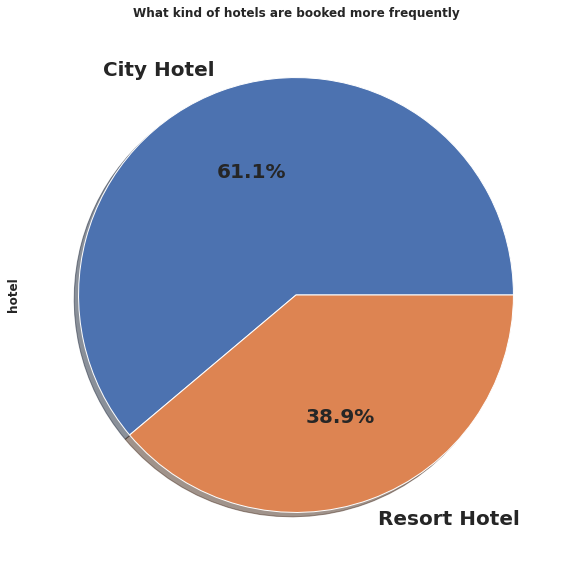

In [75]:
#plotting this insight.
hotels_df_copy['hotel'].value_counts().plot(kind='pie', figsize=(15,10), title='What kind of hotels are booked more frequently', autopct='%1.1f%%' , fontsize=20 , shadow=True)

we can conclude city hotels are more booked by customers

[Text(0.5, 1.0, 'Mean ADR of the hotel types')]

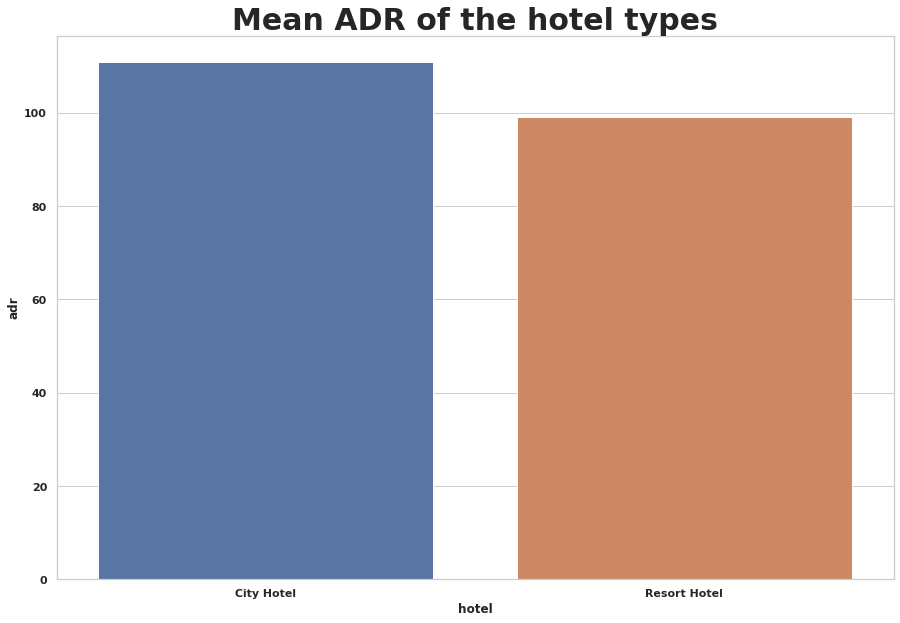

In [76]:
#comparing hotel type with there adr(total revenue)
hotel_type_adr= hotels_df_copy.groupby(['hotel'])['adr'].mean().reset_index()

# Setting fontsizes,fontweight,label weight for lebels,titles.
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 30
plt.rcParams["axes.titleweight"] = 'bold'
plt.figure(figsize=(15,10))

#ploting the data
sns.barplot(x=hotel_type_adr['hotel'],y=hotel_type_adr['adr'],data=hotel_type_adr).set(title='Mean ADR of the hotel types')


So , we can conclude that as city hotels are booked more(66.4%) and resort hotels are booked less(33.6%) but city hotel only have 52.6% ADR and resort hotel has 47.41% ADR share in total ADR combined, we can conclude that city hotels are more cheaper.

## Corelation of all the features

Text(0.5, 1.0, 'Corelation of all the features in Dataset')

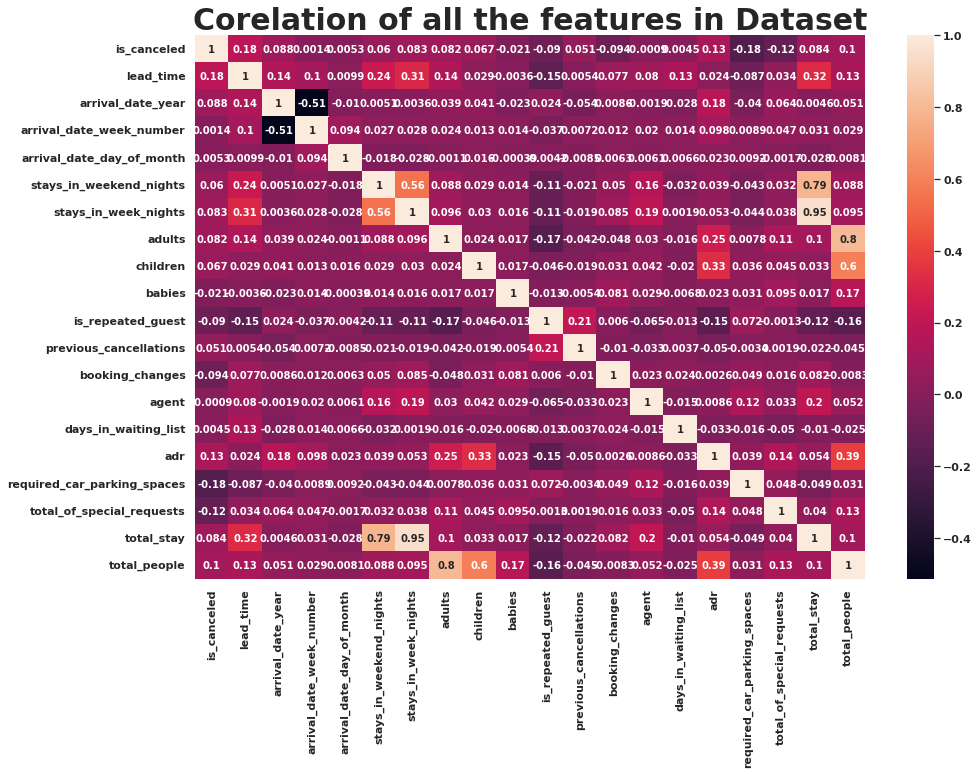

In [77]:
# Ploting a heatmap for correlation data for all the columns in data set.
# Set figure size
plt.figure(figsize=(15,10))

# Plotting heat map
sns.heatmap(hotels_df_copy.corr(),annot=True)

# Setting title
plt.title('Corelation of all the features in Dataset')

**Some Insights:**

1) Stays in week night and total stay are positively corelated, even more than weekend nights which says, longer stays are in week time only.

2) lead_time and total_stay is positively corelated. That means more is the stay of customer more will be the lead time.

3) Total people, total stay and  ADR has positive correlation which means more the people, longer the stay will give more revenue.

4) is_repeated guest and previous bookings not canceled has strong correlation. may be repeated guests are not more likely to cancel their bookings.

5) adults and lead time a positively corelated which means more the adults more the lead time

6) children and lead time a re negatively co-related means more the children lesser the lead time.

7) ADR and children are very positively corelated, which states more the children more is the revenue.

## Best time to book a hotel


In [78]:
# When most bookings are done in a year

# Month list for index use
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# groupby arrival_date_month and taking the hotel count
months_booking_df =hotels_df_copy.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})


# creating df which will map the order of above months list without changing its values.
months_booking_df['arrival_date_month']=pd.Categorical(months_booking_df['arrival_date_month'],categories=months,ordered=True)

# sorting by arrival_date_month
bookings_months_df=months_booking_df.sort_values('arrival_date_month')

bookings_months_df

,arrival_date_month,Counts
4,January,4693
3,February,6098
7,March,7513
0,April,7908
8,May,8355
6,June,7765
5,July,10057
1,August,11257
11,September,6690
10,October,6934


[Text(0.5, 1.0, 'Booking frequency by months')]

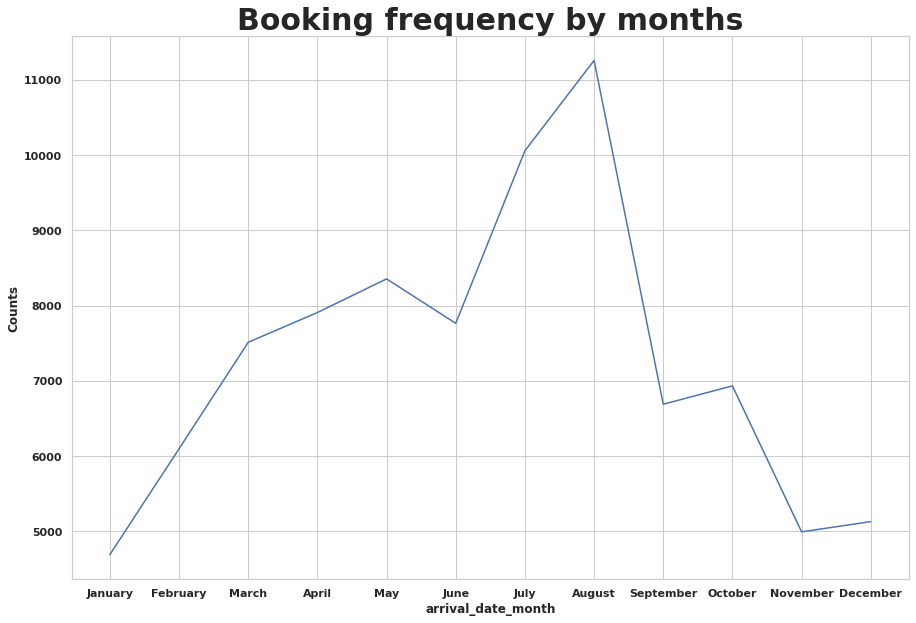

In [79]:
#plotting the graph

# Setting figure size
plt.figure(figsize=(15,10))

# Plotting the graph
sns.lineplot(x=bookings_months_df['arrival_date_month'],y=bookings_months_df['Counts']).set(title='Booking frequency by months')

Some Insights:

1) The booking frequency rises from january and is on peak at august starting and later it decreases till november.

2) Peak period is June,July ,August and September.

3) Best time to book a hotel is frim November to March to get less rush in hotels.



## When is the busiest period for hotels

In [80]:
#Finding total unique value counts for every month
counts_per_month= hotels_df_copy.arrival_date_month.value_counts()
counts_per_month

August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64

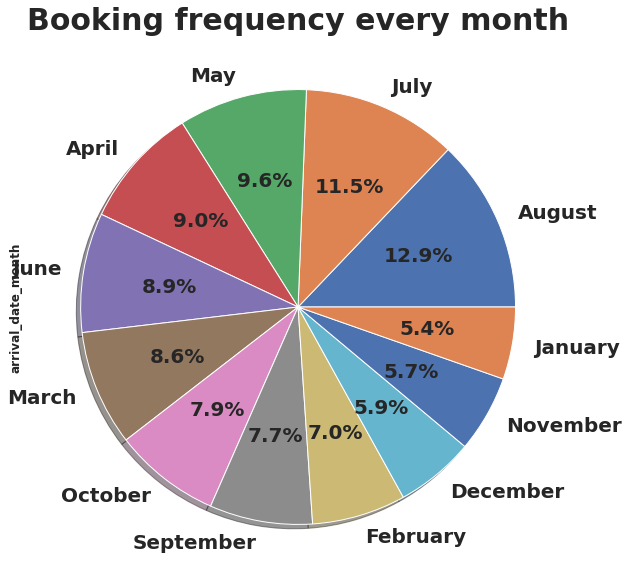

In [81]:
# plotting it
counts_per_month.plot.pie(figsize=(15,10), title='Booking frequency every month', autopct='%1.1f%%' , fontsize=20 , shadow=True)


Some Insights:

1) August is the busiest month with 11.6% weightage.

2) January is the least busiest month.

## Optimal stay length for city and resort type hotels.

In [82]:
# Group by of total stay and hotel
days_hotel = hotels_df_copy.groupby(['total_stay', 'hotel']).agg('count').reset_index()   
days_hotel = days_hotel.iloc[:, :3]                                                   # take 1st 3 columns
days_hotel = days_hotel.rename(columns={'total_stay': 'Number of days stayed' ,'is_canceled':'Number of stays'})

days_hotel

,Number of days stayed,hotel,Number of stays
0,0,City Hotel,288
1,0,Resort Hotel,363
2,1,City Hotel,10284
3,1,Resort Hotel,6900
4,2,City Hotel,10824
...,...,...,...
71,49,City Hotel,1
72,56,Resort Hotel,2
73,57,City Hotel,1
74,60,Resort Hotel,1


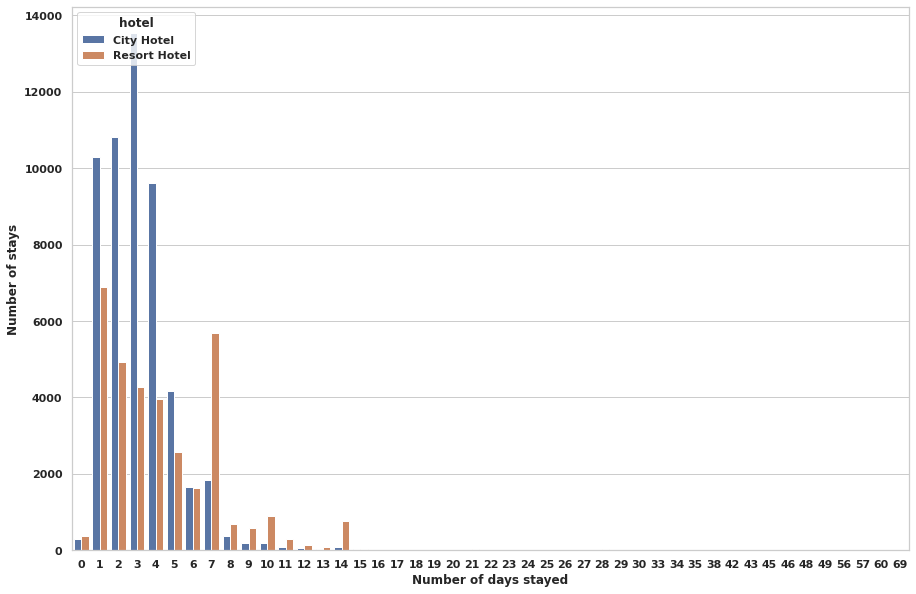

In [83]:
# Plotting the graph

# Setting figure size
plt.figure(figsize=(15,10))

# Plotting the graph
sns.barplot(x='Number of days stayed',y='Number of stays',hue='hotel',data=days_hotel)


Some Insights:

1) For City Hotel - mostly booked stay length is 2 and 3 Days.

2) For Resort Hotel- mostly booked stay length is 1 and 7 days.

## Most booked Room Type

In [84]:
# Finding which room type or unique value occurs most
room_type_df= hotels_df_copy.reserved_room_type.value_counts(normalize=True)

room_type_df

A    0.647078
D    0.199071
E    0.069214
F    0.032301
G    0.023479
B    0.011431
C    0.010470
H    0.006820
L    0.000069
P    0.000069
Name: reserved_room_type, dtype: float64

Text(0.5, 0, 'Room Type')

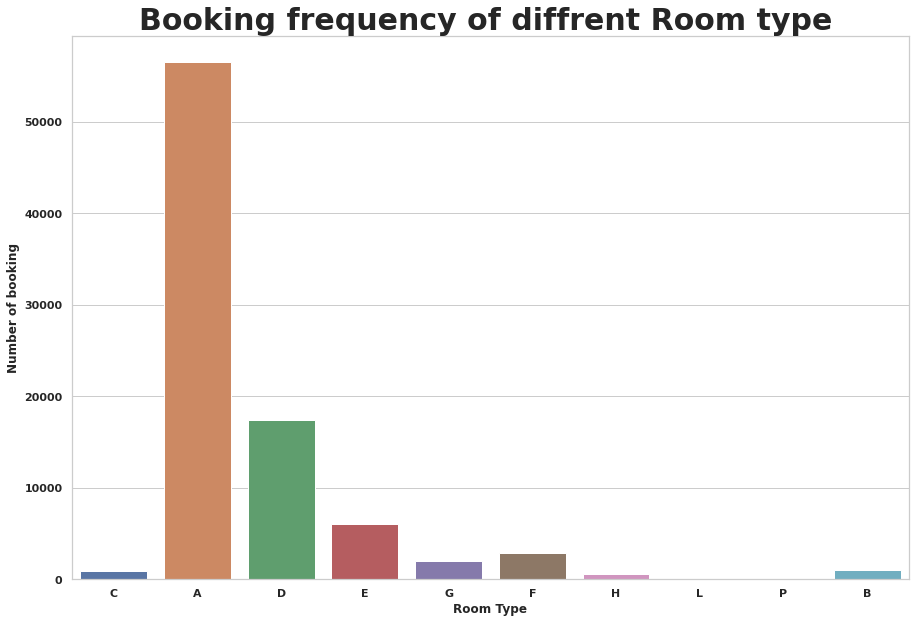

In [85]:
# Plotting the graph

# Setting the figure size
plt.figure(figsize=(15,10))

# Plotting the graph
sns.countplot(x=hotels_df_copy['reserved_room_type'])
plt.title('Booking frequency of diffrent Room type ')
plt.ylabel('Number of booking')
plt.xlabel('Room Type')

**Some Insights:**

1) Room type A is booked highest.

2) Room type L is booked least.

## How many guest got the room they reserved

([<matplotlib.axis.XTick at 0x7fa370339510>,
 [Text(0, 0, 'Not Canceled'), Text(0, 0, 'Canceled')])

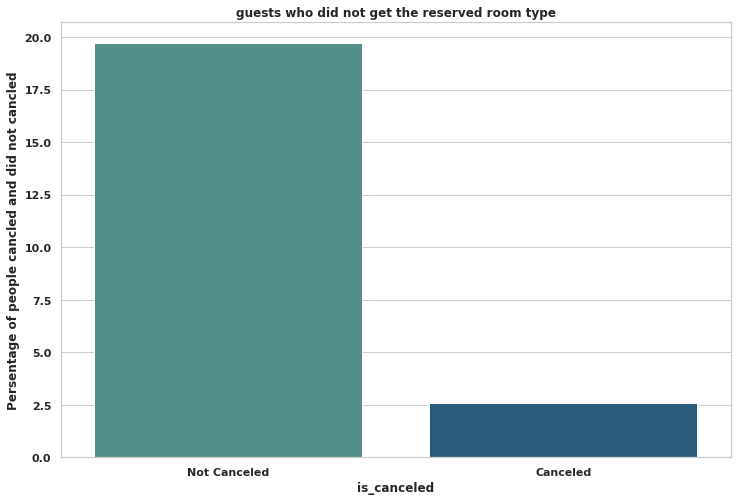

In [86]:
# Function to return 1 if reserved room was alloted on check in or not, else 0 is returned.
def same_room_alloted(x):
  '''functions tells if the room they wanted was given or not'''

  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0  
    

# adding a new column hotels_df_copy which tells the room type rreserved was given or not

hotels_df_copy['Same_room_alloted']=hotels_df_copy.apply(lambda x: same_room_alloted(x),axis=1)

#groupby with "is canceled"
groupby_bookcanceled_df=hotels_df_copy.groupby('is_canceled')

# create DF and calculate  percentage of same room alloted  or not
Same_room_alloted_or_not_df=pd.DataFrame(groupby_bookcanceled_df['Same_room_alloted'].sum()*100/groupby_bookcanceled_df.size()).rename(columns={0:"percentage"})
Same_room_alloted_or_not_df

#Setting figure size and plotting the graph
plt.figure(figsize=(12,8))

# Adding some styling to it.
sns.set(style="whitegrid", color_codes=True)

titanic = sns.load_dataset("titanic")
data = titanic.groupby("deck").size()  # data underlying bar plot in question

pal = sns.color_palette("crest_r", len(data))
rank = data.argsort().argsort() 

sns.barplot(x=Same_room_alloted_or_not_df.index,y=Same_room_alloted_or_not_df['percentage'], palette=np.array(pal[::-1])[rank])

# set labels
plt.title('guests who did not get the reserved room type')
plt.xlabel('is_canceled')
plt.ylabel('Persentage of people cancled and did not cancled')
plt.xticks([0,1],['Not Canceled','Canceled'])


**Some Insights**

1) more than 19% did not cancel and almost 2% cancled when they did not get the room they reserved

## Guests count from all countries

Text(0.5, 1.0, 'Number of guests from different counties')

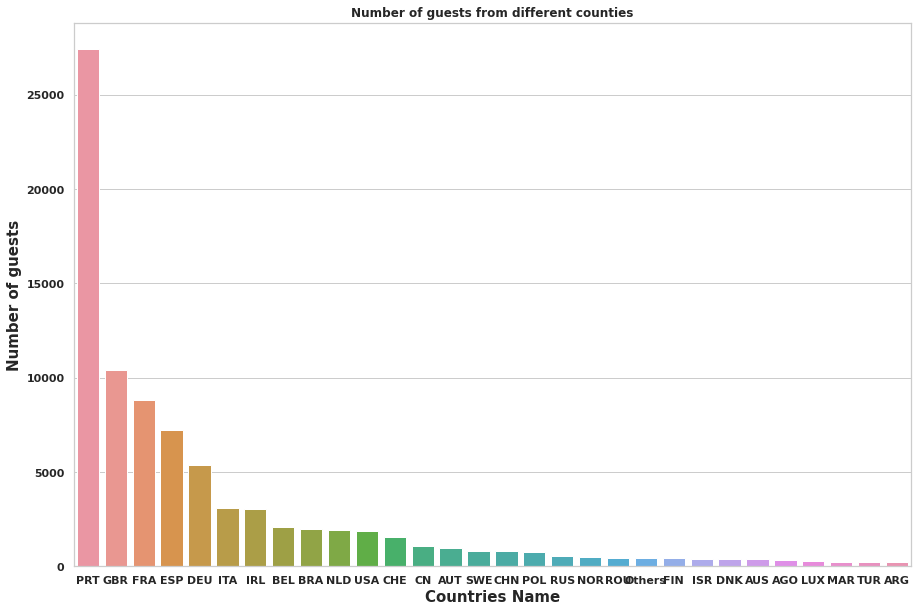

In [87]:
# Counting the guests from various countries.
countries_df=hotels_df_copy['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:30]


# Setting figure size
plt.figure(figsize=(15,10))

# Plotting the graph
sns.barplot(x=countries_df['country'],y=countries_df['count of guests'])
plt.xlabel('Countries Name', fontsize=15)
plt.ylabel('Number of guests',fontsize=15)
plt.title("Number of guests from different counties")


**Some Insights:**

1) Graph shows top 30 Countries.

2) Portugal has the most guest.

## Cancellation ration in city and resort type hotel.

In [88]:
#cancellation count

resort_cancellation=hotels_df_copy[hotels_df_copy["hotel"]=="Resort Hotel"]["is_canceled"].value_counts()
city_cancellation=hotels_df_copy[hotels_df_copy['hotel']=='City Hotel']["is_canceled"].value_counts()
total_cancel=hotels_df_copy['is_canceled'].value_counts()

Text(0.5, 1.0, 'Resort Hotel')

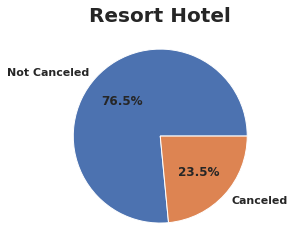

In [89]:
#cancellations ratio in resort hotels

plt.pie(resort_cancellation,labels=["Not Canceled","Canceled"],autopct='%1.1f%%')
plt.title("Resort Hotel", fontsize=20)


Insight-
1. Resort hotels get 28% cancellation and 72% confirm booking out of all bookings.

Text(0.5, 1.0, 'City Hotel')

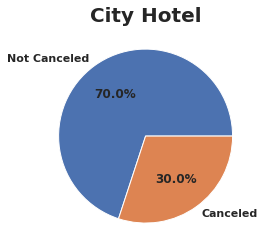

In [90]:
#Cancellations ratio in city hotels

plt.pie(city_cancellation,labels=["Not Canceled","Canceled"],autopct='%1.1f%%')
plt.title("City Hotel", fontsize=20)

Insight-
1. City hotels get 41.7% cancellation and 58.3% confirm booking out of all bookings.

## Bookings made through three main market segments from diffrent countries.

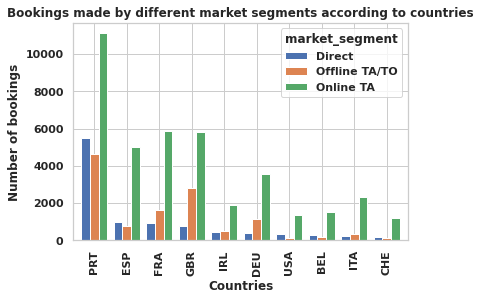

In [91]:
#Plotting bookings made through three main market segments by different countries' 

market_segment_by_country=hotels_df_copy.groupby(['country','market_segment'])['market_segment'].count().unstack().sort_values('Direct',ascending=False).head(10)
market_segment_by_country[['Direct','Offline TA/TO','Online TA']].plot(kind='bar',width=0.8)
plt.title('Bookings made by different market segments according to countries')
plt.xlabel('Countries')
plt.ylabel('Number of bookings')
plt.rcParams['figure.figsize'] = (10, 5)


Insight-
1.  On average 'Online TA' is the most preferred channel and on average least preferred is 'Direct' channel. 
2. Maximum bookings are from Portugal country, followed by country GRB(United kingdom)


## Average daily rates(ADR) Monthwise.

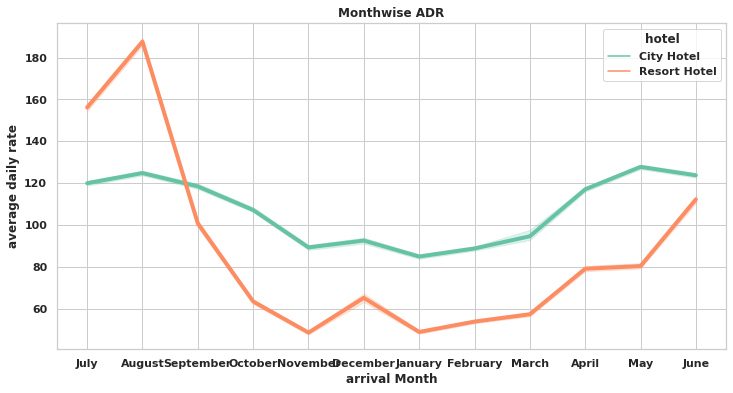

In [92]:
#average daily rate monthwise = rooms revenue / rooms sold

plt.figure(figsize=(12,6))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=hotels_df_copy,
             hue_order = ["City Hotel", "Resort Hotel"],palette= 'Set2',linewidth = 4)

plt.title("Monthwise ADR")
plt.xlabel("arrival Month")
plt.ylabel("average daily rate")
plt.show()

Insights-
1. For city hotel ADR is maximum between April and September, and minumum between november and march.
2. For resort hotel ADR is maximum between June and September, and minumum between november and march.

# **Conclusion**

By doing research and  exploratory data analysis on the data set we can conclude that the hotel industry can be benefited by studying the type of customers, room preferences, best booking channel, special requests probability each month, distribution channel, preferred hotel type, what meals to be served and what new meals to introduce, etc. we can make hotel industry more profitable by focusing on customers benefit and what customers need. This will attract more customers and more revenue could be generated. Many new services and things can be introduced for better customer service, for example better discount deals, promoting and introducing more benefits on direct booking to avoid commissions to agents and other channels, introducing new meals for those country’s tourists who visit most. Correlation charts help in understanding relation between all column data for more improvements and learnings.

# **Insights**

I have mentioned all the meaningful insight below each graph.
please refer all the graphs.